In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score

In [46]:
# Import necessary libraries
import pandas as pd

# Specify the path to the BindingDB dataset file
file_path = 'BindingDB_All.tsv'

# Step 1: Selective loading of columns to reduce memory usage
# Specify the columns to load
list_columns_kept = ['Ligand SMILES', 'Target Name', 'Target Source Organism According to Curator or DataSource', 'Target Name', 'Ki (nM)', 'IC50 (nM)', 'Kd (nM)', 'EC50 (nM)', 'kon (M-1-s-1)', 'koff (s-1)', 'pH', 'Temp (C)', 
                'Number of Protein Chains in Target (>1 implies a multichain complex)', 'BindingDB Target Chain Sequence', 'BindingDB Target Chain Sequence.1',
                'BindingDB Target Chain Sequence.2', 'BindingDB Target Chain Sequence.3', 'BindingDB Target Chain Sequence.4', 'BindingDB Target Chain Sequence.5',
                'BindingDB Target Chain Sequence.6', 'BindingDB Target Chain Sequence.7', 'BindingDB Target Chain Sequence.8', 'BindingDB Target Chain Sequence.9', 
                'BindingDB Target Chain Sequence.10', 'BindingDB Target Chain Sequence.11', 'BindingDB Target Chain Sequence.12']
data = pd.read_csv(file_path, sep='\t', usecols=list_columns_kept, na_values=['', 'NULL'])
df = pd.DataFrame(data)
df.head()

/var/folders/7z/y2p4cj3n02g7g064sxpd55380000gn/T/ipykernel_15690/3501067610.py:14: DtypeWarning:

Columns (8,9,10,11,12,13,15,50,62,74,86,98,110,122,134,146,158,170,182) have mixed types. Specify dtype option on import or set low_memory=False.



,Ligand SMILES,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),kon (M-1-s-1),koff (s-1),pH,...,BindingDB Target Chain Sequence.3,BindingDB Target Chain Sequence.4,BindingDB Target Chain Sequence.5,BindingDB Target Chain Sequence.6,BindingDB Target Chain Sequence.7,BindingDB Target Chain Sequence.8,BindingDB Target Chain Sequence.9,BindingDB Target Chain Sequence.10,BindingDB Target Chain Sequence.11,BindingDB Target Chain Sequence.12
0,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.24,NaN,NaN,NaN,NaN,NaN,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.25,NaN,NaN,NaN,NaN,NaN,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.41,NaN,NaN,NaN,NaN,NaN,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.8,NaN,NaN,NaN,NaN,NaN,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.99,NaN,NaN,NaN,NaN,NaN,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#metric analysis to find which one between Ki and Kd are mostly present values in the dataset
non_nan_ki = data['Ki (nM)'].count()
print('Numbers of data containing Ki information: ', non_nan_ki)

non_nan_kd = data['Kd (nM)'].count()
print('Numbers of data containing Kd information: ', non_nan_kd)

Numbers of data containing Ki information:  591908
Numbers of data containing Kd information:  110827


We have information about Ki more than Kd in the dataset.

In [48]:
# Drop rows that contain any NaN value
df_cleaned = data.dropna(subset= ['Ligand SMILES', 'Target Name', 'Target Source Organism According to Curator or DataSource', 'Ki (nM)'], how = 'any')
df_cleaned.reset_index
#df_cleaned.head()


<bound method DataFrame.reset_index of                                              Ligand SMILES  \
0        O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...   
1        O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...   
2        O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...   
3        OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...   
4        OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...   
...                                                    ...   
2913146                            NOCc1ccc(cc1)S(N)(=O)=O   
2913147                         CC(=O)Nc1nnc(s1)S(N)(=O)=O   
2913148  CC(C)C[C@H](NC(=O)[C@H](CO)NC(=O)\C=N\OCc1ccc(...   
2913149  CC(C)C[C@H](NC(=O)[C@H](CO)NC(=O)\C=N\OCc1ccc(...   
2913150   NC(=O)[C@H](CO)NC(=O)\C=N\OCc1ccc(cc1)S(N)(=O)=O   

                                    Target Name  \
0        Dimer of Gag-Pol polyprotein [501-599]   
1        Dimer of Gag-Pol polyprotein [501-599]   
2        Dimer of Gag-Pol polyprotein [501-599]   
3        Dim

In [49]:
#HIV1 targeting coumpunds
hiv_data = df_cleaned[df_cleaned['Target Source Organism According to Curator or DataSource'].str.contains("Human immunodeficiency virus 1", case=False, na=False)].copy()
print(hiv_data.size)

108750


In [50]:
hiv_data

,Ligand SMILES,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),kon (M-1-s-1),koff (s-1),pH,...,BindingDB Target Chain Sequence.3,BindingDB Target Chain Sequence.4,BindingDB Target Chain Sequence.5,BindingDB Target Chain Sequence.6,BindingDB Target Chain Sequence.7,BindingDB Target Chain Sequence.8,BindingDB Target Chain Sequence.9,BindingDB Target Chain Sequence.10,BindingDB Target Chain Sequence.11,BindingDB Target Chain Sequence.12
0,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.24,NaN,NaN,NaN,NaN,NaN,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.25,NaN,NaN,NaN,NaN,NaN,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.41,NaN,NaN,NaN,NaN,NaN,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.8,NaN,NaN,NaN,NaN,NaN,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.99,NaN,NaN,NaN,NaN,NaN,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909379,COc1ccc2c(O)c(C(C3CC3)c3ccccc3)c(=O)oc2c1,Gag-Pol polyprotein [489-587],Human immunodeficiency virus 1,170,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2909380,CCC(Cc1ccccc1)c1cc(O)c(C(CC)c2ccccc2)c(=O)o1,Gag-Pol polyprotein [489-587],Human immunodeficiency virus 1,38,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2909381,CCC(Cc1ccccc1)c1cc(O)c(C(C2CC2)c2cccc(NC(=O)[C...,Gag-Pol polyprotein [489-587],Human immunodeficiency virus 1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2909382,CCC[C@@]1(CCc2ccccc2)CC(O)=C([C@H](CC)c2cccc(N...,Gag-Pol polyprotein [489-587],Human immunodeficiency virus 1,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of targets of the comounds in HIV1:  126


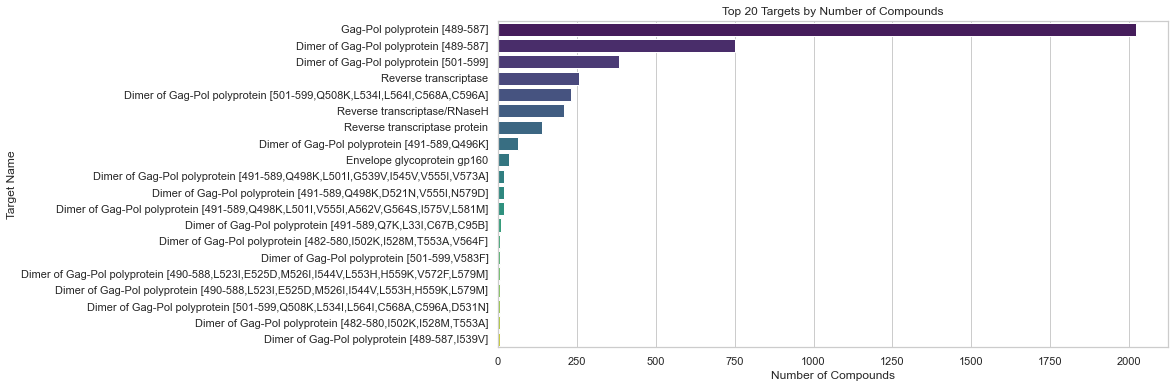

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

target_counts = hiv_data.groupby('Target Name').size().reset_index(name='Compound Count')

# Step 5: Sort targets by the number of compounds
target_counts = target_counts.sort_values(by='Compound Count', ascending=False)
print('Number of targets of the comounds in HIV1: ', target_counts.size)

# Step 6: Plot the distribution of targets
plt.figure(figsize=(12, 6))
sns.barplot(x='Compound Count', y='Target Name', data=target_counts.head(20), palette='viridis')
plt.title('Top 20 Targets by Number of Compounds')
plt.xlabel('Number of Compounds')
plt.ylabel('Target Name')
plt.show()

In [52]:
# Import necessary libraries
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.cluster import KMeans
import numpy as np
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator

# Step 1: Generate Morgan Fingerprints
def generate_fingerprints(smiles_list, radius=2, n_bits=1024):
    """Generates Morgan fingerprints for a list of SMILES strings using MorganGenerator."""
    generator = GetMorganGenerator(radius=radius, fpSize=n_bits)  
    fingerprints = []
    
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            fp = generator.GetFingerprint(mol)
            arr = np.zeros((1,), dtype=int)
            AllChem.DataStructs.ConvertToNumpyArray(fp, arr)
            fingerprints.append(arr)
        else:
            fingerprints.append(None)
    
    return np.array([fp for fp in fingerprints if fp is not None])  # Remove None entries

# Load your cleaned dataset
# Assuming the DataFrame 'hiv_data' with a column 'Ligand SMILES' is already prepared
smiles_list = hiv_data['Ligand SMILES'].tolist()

# Generate fingerprints
fingerprint_matrix = generate_fingerprints(smiles_list)

#Standardize the fingerprints
scaler = StandardScaler()
fingerprint_matrix_scaled = scaler.fit_transform(fingerprint_matrix)




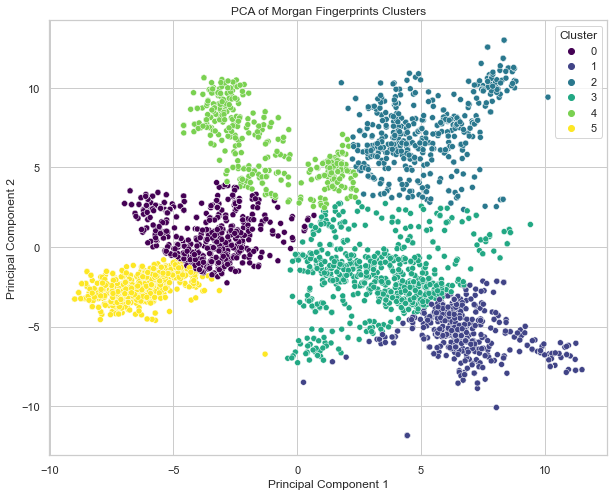

In [53]:

from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Perform PCA on the fingerprint matrix
pca = PCA(n_components=2)
pca_result = pca.fit_transform(fingerprint_matrix_scaled)


# Add PCA results to a DataFrame for easier plotting¨
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(pca_result)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans.labels_  # Assuming 'kmeans' is the model fitted with an optimal k

# Visualize the PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA of Morgan Fingerprints Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

4    1700
1    1662
5     506
3     186
0     180
2     116
Name: Cluster, dtype: int64


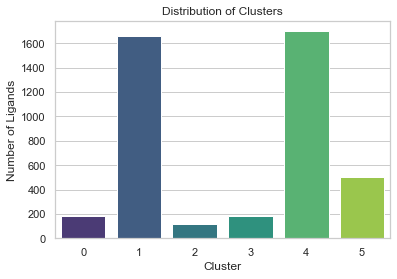

In [54]:
# Step 2: Perform Clustering with KMeans
# Adjust the number of clusters (n_clusters) as needed for your analysis
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(fingerprint_matrix_scaled)

# Add cluster labels to the DataFrame
hiv_data['Cluster'] = kmeans.labels_

# Display cluster counts
print(hiv_data['Cluster'].value_counts())

# Visualize the distribution of clusters (optional)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Cluster', data=hiv_data, palette='viridis')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Ligands')
plt.show()

In [55]:
cluster_dataframes={}
for cluster in range(6):
    cluster_dataframes[f'Cluster_{cluster}'] = hiv_data[hiv_data['Cluster'] == cluster]
    print(cluster_dataframes[f'Cluster_{cluster}'].groupby('Target Name').size().reset_index(name='Compound Count'))


                                          Target Name  Compound Count
0        Dimer of Gag-Pol polyprotein [489-587,I539V]               5
1   Dimer of Gag-Pol polyprotein [489-587,L499I,L5...               5
2   Dimer of Gag-Pol polyprotein [489-587,M535I,L5...               5
3              Dimer of Gag-Pol polyprotein [489-587]              15
4   Dimer of Gag-Pol polyprotein [501-599,Q508K,L5...               1
5   Dimer of Gag-Pol polyprotein [501-599,Q508K,L5...               1
6   Dimer of Gag-Pol polyprotein [501-599,Q508K,L5...               1
7   Dimer of Gag-Pol polyprotein [501-599,Q508K,L5...               1
8   Dimer of Gag-Pol polyprotein [501-599,Q508K,L5...               1
9   Dimer of Gag-Pol polyprotein [501-599,Q508K,L5...             102
10                      Gag-Pol polyprotein [489-587]              43
                                          Target Name  Compound Count
0   Dimer of Gag-Pol polyprotein [482-580,I502K,I5...               6
1   Dimer of Gag-Pol

In [56]:
index_cluster0 = cluster_dataframes['Cluster_0'].index
index_cluster1 = cluster_dataframes['Cluster_1'].index
index_cluster2 = cluster_dataframes['Cluster_2'].index
index_cluster3 = cluster_dataframes['Cluster_3'].index
index_cluster4 = cluster_dataframes['Cluster_4'].index
index_cluster5 = cluster_dataframes['Cluster_5'].index


In [57]:
random_index_0 = np.random.choice(index_cluster0, size=5, replace=False)
random_index_1 = np.random.choice(index_cluster1, size=5, replace=False)
random_index_2 = np.random.choice(index_cluster2, size=5, replace=False)
random_index_3 = np.random.choice(index_cluster3, size=5, replace=False)
random_index_4 = np.random.choice(index_cluster4, size=5, replace=False)
random_index_5 = np.random.choice(index_cluster5, size=5, replace=False)

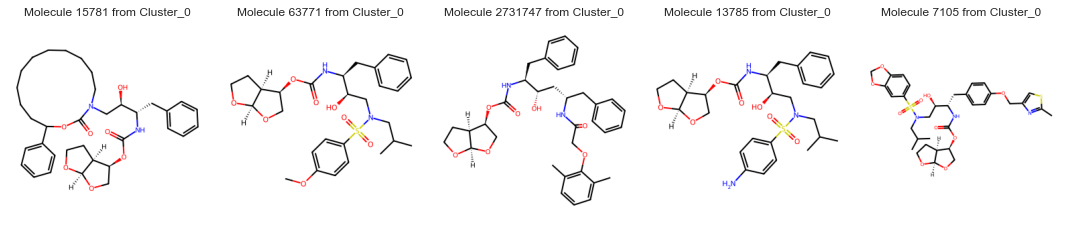

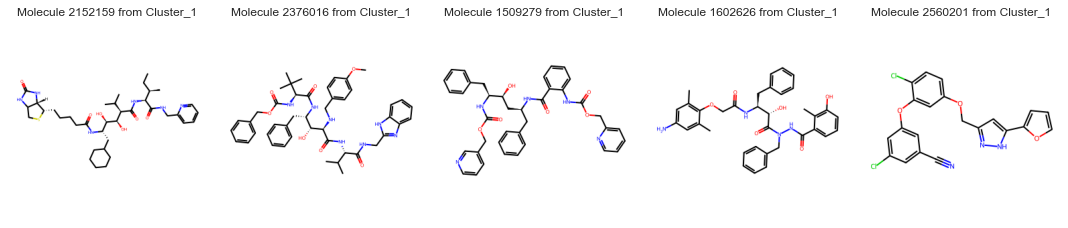

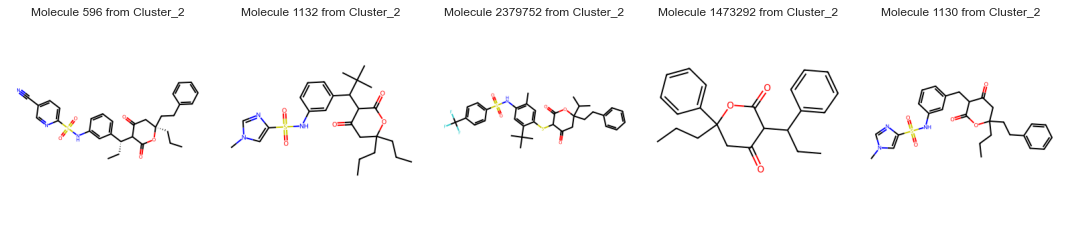

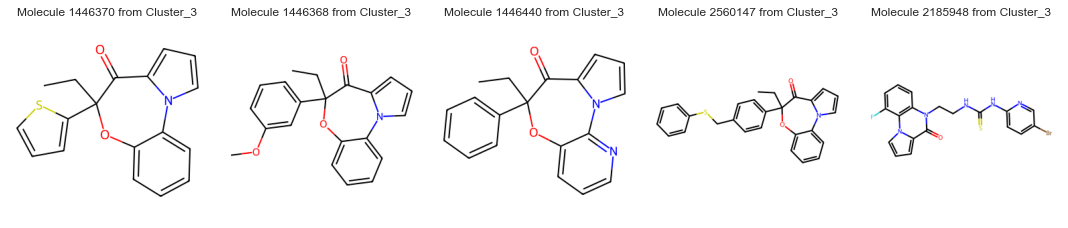

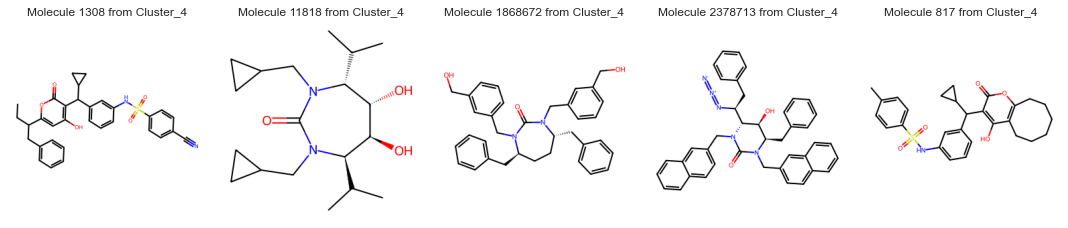

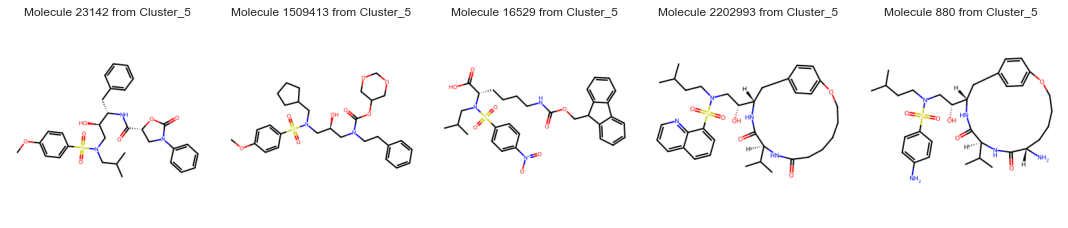

In [58]:
from rdkit.Chem import Draw
from rdkit import Chem

# Plot random molecules from each cluster
for cluster_index, random_indices in zip(range(6), [random_index_0, random_index_1, random_index_2, random_index_3, random_index_4, random_index_5]):
    cluster_name = f'Cluster_{cluster_index}'
    fig, ax = plt.subplots(1, 5, figsize=(15, 15), sharey=True, sharex=True)
    ax = ax.ravel()  # Flatten the 2D array of axes for easier iteration

    # Loop through the random indices for this cluster
    for idx, random_idx in enumerate(random_indices):
        # Retrieve the SMILES string for the ligand
        smiles = cluster_dataframes[cluster_name].loc[random_idx, 'Ligand SMILES']
        mol = Chem.MolFromSmiles(smiles)

        # Draw the molecule in the corresponding subplot
        img = Draw.MolToImage(mol)
        ax[idx].imshow(img)
        ax[idx].axis('off')  # Hide the axes
        ax[idx].set_title(f"Molecule {random_idx} from {cluster_name}")

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

